In [1]:
import numpy as np
import pandas as pd
#generate data
np.random.seed(42)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_b=np.c_[np.ones((100,1)),x]


In [3]:
#batch gradient descent
def batch_gradient_descent(x,y,learning_rate=0.01,iterations=100):
  m=len(x)
  theta=np.random.randn(2,1)
  for iteration in range(iterations):
    gradients=2/m*x.T.dot(x.dot(theta)-y)
    theta=theta-learning_rate*gradients
  return theta

theta_bgd=batch_gradient_descent(x_b,y)
print("Bgd theta:",theta_bgd)


Bgd theta: [[2.41172788]
 [4.30338504]]


In [5]:
#stochastic gradient descent(takes random data)
def stochastic_gradient_descent(x,y,learning_rate=0.1,n_epochs=50):
  m=len(y)
  theta=np.random.randn(2,1)
  for epoch in range(n_epochs):
    for i in range(m):
      random_index=np.random.randint(m)
      xi=x[random_index:random_index+1]
      yi=y[random_index:random_index+1]
      gradients=2*xi.T.dot(xi.dot(theta)-yi)
      theta=theta-learning_rate*gradients
  return theta
theta_sgd=stochastic_gradient_descent(x_b,y)
print("Sgd Theta:",theta_sgd)

Sgd Theta: [[4.4690199 ]
 [2.69900802]]


In [6]:
#Mini batch gradient descent
def mini_batch_gradient_descent(x,y,learning_rate=0.01,iterations=100,batch_size=20):
  m=len(y)
  theta=np.random.randn(2,1)
  for iteration in range(iterations):
    shuffled_indices=np.random.permutation(m)
    x_shuffled=x[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,batch_size):
      xi=x[i:i+batch_size]
      yi=y[i:i+batch_size]
      get_ipython().run_line_magic('matplotlib', 'inline')
      gradients=2/batch_size*xi.T.dot(xi.dot(theta)-yi)
      theta=theta-learning_rate*gradients
  return theta
theta_mbgd=mini_batch_gradient_descent(x_b,y)
print("Mini-batch GD theta:",theta_mbgd)

Mini-batch GD theta: [[4.03604724]
 [2.936544  ]]


[[0]
 [2]]


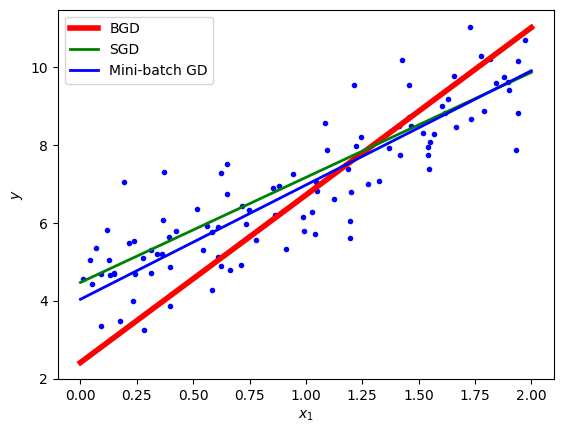

In [12]:
#plot results
import matplotlib.pyplot as plt # Import the matplotlib library

def plot_gradient_descent(x,y,theta_bgd,theta_sgd,theta_mbgd):
  plt.plot(x,y,'b.')
  x_new=np.array([[0],[2]])
  x_new_b=np.c_[np.ones((2,1)),x_new]
  print(x_new)
  y_predict_bgd=x_new_b.dot(theta_bgd)
  y_predict_sgd=x_new_b.dot(theta_sgd)
  y_predict_mbgd=x_new_b.dot(theta_mbgd)
  plt.plot(x_new,y_predict_bgd,'r-',linewidth=4,label="BGD")
  plt.plot(x_new,y_predict_sgd,'g-',linewidth=2,label="SGD")
  plt.plot(x_new,y_predict_mbgd,'b-',linewidth=2,label="Mini-batch GD")
  plt.xlabel("$x_1$")
  plt.ylabel("$y$")
  plt.legend(loc="upper left")
  plt.show()
plot_gradient_descent(x,y,theta_bgd,theta_sgd,theta_mbgd)

In [15]:
#momentum based gradient
def gradient_descent_with_momentum(x,y,learning_rate,gamma,num_iterations, theta): # Added theta as a parameter
  m=len(y)
  velocity=np.zeros_like(theta)

  for i in range(num_iterations):
    gradients=2/m*x.T.dot(x.dot(theta)-y)
    theta=gamma*theta-learning_rate*gradients
    theta=theta-velocity
  return theta

#example usage
x=np.array(([1,2],[3,4],[5,6]))
y=np.array([1,2,3])
theta=np.zeros(x.shape[1]) # Initialize theta outside the function
print(theta)
learning_rate=0.01
gamma=0.9
num_iterations=1000

theta=gradient_descent_with_momentum(x,y,learning_rate,gamma,num_iterations, theta) # Pass theta to the function
print("optimized para:",theta)

[0. 0.]
optimized para: [0.20446097 0.26765799]


In [16]:
#adagrad optimizer
#generate data
np.random.seed(42)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_b=np.c_[np.ones((100,1)),x]
#para
learning_rate=0.01
epsilon=1e-8
num_iterations=1000
theta=np.random.randn(2,1)
gradient_accum=np.zeros((2,1))

#adagrad optimizer
for iteration in range(num_iterations):
  gradients=2/len(x_b)*x_b.T.dot(x_b.dot(theta)-y)
  gradient_accum+=gradients**2
  adjusted_gradients=gradients/(np.sqrt(gradient_accum)+epsilon)
  theta-=learning_rate*adjusted_gradients
print("optimized para:",theta)

optimized para: [[0.6057044 ]
 [2.04357214]]


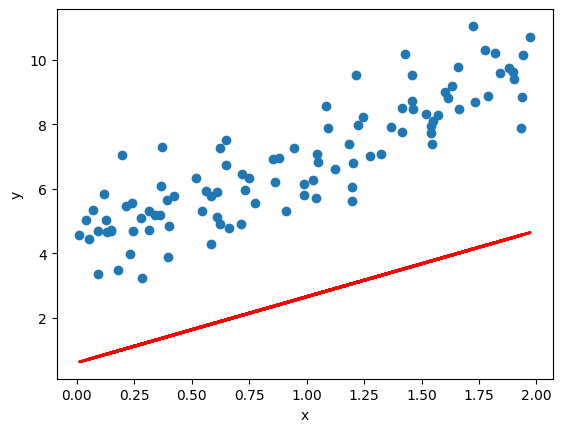

In [17]:
#plot results
plt.scatter(x,y)
plt.plot(x,x_b.dot(theta),'r-',linewidth=2,label="Adagrad")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [18]:
#rmsprop
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

def rmsprop(X_b, Y, eta=0.01, n_iterations=100, beta=0.9, epsilon=1e-8):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    G = np.zeros_like(theta)

    print("Initial theta:", theta)

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        G = beta * G + (1 - beta) * gradients**2
        adjusted_eta = eta / (np.sqrt(G) + epsilon)
        theta -= adjusted_eta * gradients

    return theta

theta_rmsprop = rmsprop(X_b, Y)
print("RMSProp theta:", theta_rmsprop)

Initial theta: [[0.01300189]
 [1.45353408]]
RMSProp theta: [[1.06834186]
 [2.50445019]]
